# Clustering Method: K-Means Algorithm #

## K-Means algorithm implemantation on personality data ##

First of all, owing to have multiple aspect of personality in psychology also in our dataset, is implemented clustering algorithm for detection of personality. 
Personality attribute is selected for clustering. 
K-Means algorithm is implemented for clustering model.

## Relevant dataset import ##

Uploaded dataset on Jupyter locally

In [1]:
import pandas as pd

data = pd.read_csv(r"personality.csv")
data 

,Cinsiyet,Nevrotik,Disdon,Acikfikir,Yumbas,Durust
0,2,4.4,1.2,4.0,3.2,2.2
1,1,3.4,5.0,5.0,3.8,4.2
2,2,3.4,3.6,3.2,4.0,3.8
3,1,1.6,5.0,4.6,4.6,4.6
4,2,2.0,4.0,5.0,3.0,3.8
...,...,...,...,...,...,...
492,1,3.4,2.6,1.2,1.8,1.2
493,1,4.2,2.6,3.8,4.2,4.0
494,2,2.6,2.6,4.8,3.6,3.8
495,2,3.2,3.2,4.8,3.0,1.6


In [2]:
data.shape

(497, 6)

In [3]:
data.describe()

,Cinsiyet,Nevrotik,Disdon,Acikfikir,Yumbas,Durust
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,1.388330,3.288934,3.371429,4.277264,3.677666,3.719517
std,0.487861,0.926785,0.897706,0.665499,0.659059,0.709016
min,1.000000,1.000000,1.200000,1.200000,1.200000,1.200000
25%,1.000000,2.600000,2.800000,3.800000,3.400000,3.200000
50%,1.000000,3.400000,3.400000,4.400000,3.800000,3.800000
75%,2.000000,4.000000,4.000000,4.800000,4.200000,4.200000
max,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cinsiyet,497.0,1.388330,0.487861,1.0,1.0,1.0,2.0,2.0
Nevrotik,497.0,3.288934,0.926785,1.0,2.6,3.4,4.0,5.0
Disdon,497.0,3.371429,0.897706,1.2,2.8,3.4,4.0,5.0
Acikfikir,497.0,4.277264,0.665499,1.2,3.8,4.4,4.8,5.0
Yumbas,497.0,3.677666,0.659059,1.2,3.4,3.8,4.2,5.0
Durust,497.0,3.719517,0.709016,1.2,3.2,3.8,4.2,5.0


In [5]:
data.isnull()

,Cinsiyet,Nevrotik,Disdon,Acikfikir,Yumbas,Durust
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
492,False,False,False,False,False,False
493,False,False,False,False,False,False
494,False,False,False,False,False,False
495,False,False,False,False,False,False


In [5]:
## from sklearn.cluster import KMeans

data = pd.read_csv(r"personality.csv")
data.drop(['Cinsiyet'], axis=1)

,Nevrotik,Disdon,Acikfikir,Yumbas,Durust
0,4.4,1.2,4.0,3.2,2.2
1,3.4,5.0,5.0,3.8,4.2
2,3.4,3.6,3.2,4.0,3.8
3,1.6,5.0,4.6,4.6,4.6
4,2.0,4.0,5.0,3.0,3.8
...,...,...,...,...,...
492,3.4,2.6,1.2,1.8,1.2
493,4.2,2.6,3.8,4.2,4.0
494,2.6,2.6,4.8,3.6,3.8
495,3.2,3.2,4.8,3.0,1.6


# K-Means Cluster #

Determine the optimum cluster number of using 3 different methods for K-Means algorithm
1. Elbow Score
2. Silhoutte Score
3. Davies Bouldin Score

## Elbow Score ##

<ipython-input-8-30a13012859e>:7: ConvergenceWarning: Number of distinct clusters (494) found smaller than n_clusters (495). Possibly due to duplicate points in X.
  kmeans.fit(data)
<ipython-input-8-30a13012859e>:7: ConvergenceWarning: Number of distinct clusters (494) found smaller than n_clusters (496). Possibly due to duplicate points in X.
  kmeans.fit(data)


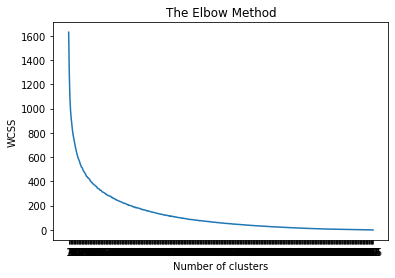

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 497):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 497), wcss)
plt.xticks(range(1, 497))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Silhoutte Score ##

Restricting the range to testing

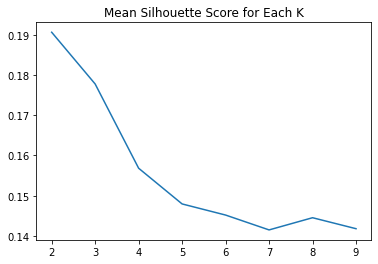

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette = []

for n in range(2, 10):
    model = KMeans(n_clusters=n, init='k-means++')
    model.fit(data)
    predict = model.predict(data)
    silhouette.append(silhouette_score(data, predict))

ax = plt.plot(silhouette)
plt.xticks(range(8), range(2, 10))
plt.title("Mean Silhouette Score for Each K")
plt.show()

## Davies Bouldin Score ##

Restricting the range to testing

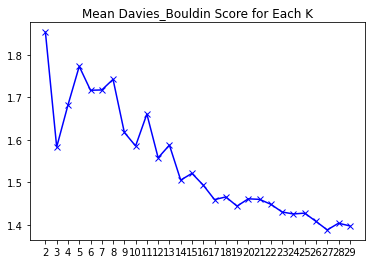

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

daviesB = []
for n in range(2, 30):
    model = KMeans(n_clusters=n)
    model.fit(data)
    predict = model.predict(data)
    daviesB.append(davies_bouldin_score(data, predict))

ax = plt.plot(daviesB, 'bx-')
plt.xticks(range(28), range(2, 30))
plt.title("Mean Davies_Bouldin Score for Each K")
plt.show()

In [9]:
# KMeans Prediction
df = pd.DataFrame(data, columns=['Nevrotik', 'Disdon', 'Acikfikir', 'Yumbas', 'Durust'])
df

,Nevrotik,Disdon,Acikfikir,Yumbas,Durust
0,4.4,1.2,4.0,3.2,2.2
1,3.4,5.0,5.0,3.8,4.2
2,3.4,3.6,3.2,4.0,3.8
3,1.6,5.0,4.6,4.6,4.6
4,2.0,4.0,5.0,3.0,3.8
...,...,...,...,...,...
492,3.4,2.6,1.2,1.8,1.2
493,4.2,2.6,3.8,4.2,4.0
494,2.6,2.6,4.8,3.6,3.8
495,3.2,3.2,4.8,3.0,1.6


## K-Means Algorithm for 5 cluster ##

In [10]:
cluster = KMeans(n_clusters=5)
predict = cluster.fit_predict(df[['Nevrotik', 'Disdon', 'Acikfikir', 'Yumbas', 'Durust']])
df['Cluster'] = predict
df.head()

,Nevrotik,Disdon,Acikfikir,Yumbas,Durust,Cluster
0,4.4,1.2,4.0,3.2,2.2,4
1,3.4,5.0,5.0,3.8,4.2,1
2,3.4,3.6,3.2,4.0,3.8,2
3,1.6,5.0,4.6,4.6,4.6,3
4,2.0,4.0,5.0,3.0,3.8,3


In [11]:
df

,Nevrotik,Disdon,Acikfikir,Yumbas,Durust,Cluster
0,4.4,1.2,4.0,3.2,2.2,4
1,3.4,5.0,5.0,3.8,4.2,1
2,3.4,3.6,3.2,4.0,3.8,2
3,1.6,5.0,4.6,4.6,4.6,3
4,2.0,4.0,5.0,3.0,3.8,3
...,...,...,...,...,...,...
492,3.4,2.6,1.2,1.8,1.2,0
493,4.2,2.6,3.8,4.2,4.0,4
494,2.6,2.6,4.8,3.6,3.8,0
495,3.2,3.2,4.8,3.0,1.6,2


## Implementing PCA Method ##

Interpreted and visualized data in 2 dimension using PCA method

In [12]:
# PCA Method
# While have more than 3 columns, have to apply PCA analysis for 2D visualize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 1.20004784, -2.4213017 , -0.4170447 , -0.72549971, -2.14529595,
         1.2921026 ],
       [ 0.11996132,  1.81597628,  1.08710055,  0.18580616,  0.67835894,
        -0.79967262],
       [ 0.11996132,  0.25487386, -1.6203609 ,  0.48957478,  0.11362796,
        -0.10241421],
       ...,
       [-0.74410789, -0.86019929,  0.7862715 , -0.11796246,  0.11362796,
        -1.49693102],
       [-0.09605598, -0.1911554 ,  0.7862715 , -1.02926833, -2.99239242,
        -0.10241421],
       [-1.60817711, -0.86019929,  1.08710055,  2.00841789,  1.8078209 ,
         0.59484419]])

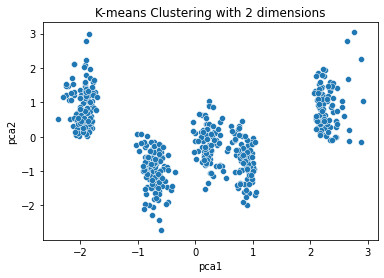

In [17]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [18]:
scale_df = StandardScaler().fit_transform(df)
scale_df

array([[ 1.20004784, -2.4213017 , -0.4170447 , -0.72549971, -2.14529595,
         1.2921026 ],
       [ 0.11996132,  1.81597628,  1.08710055,  0.18580616,  0.67835894,
        -0.79967262],
       [ 0.11996132,  0.25487386, -1.6203609 ,  0.48957478,  0.11362796,
        -0.10241421],
       ...,
       [-0.74410789, -0.86019929,  0.7862715 , -0.11796246,  0.11362796,
        -1.49693102],
       [-0.09605598, -0.1911554 ,  0.7862715 , -1.02926833, -2.99239242,
        -0.10241421],
       [-1.60817711, -0.86019929,  1.08710055,  2.00841789,  1.8078209 ,
         0.59484419]])

In [19]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(scale_df)
bilesen_df = pd.DataFrame(data = pca_fit, columns=['birinci_bilesen','ikinci_bilesen'])
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,2.023575,3.014127
1,-1.503467,-1.366468
2,0.537506,-0.125592
3,-2.185392,-1.834534
4,-0.476471,-0.975245
...,...,...
492,6.343269,-0.005363
493,-0.308734,1.748643
494,0.423149,-0.887057
495,1.583106,0.453921


In [20]:
pca.explained_variance_ratio_

array([0.29487549, 0.20863335])

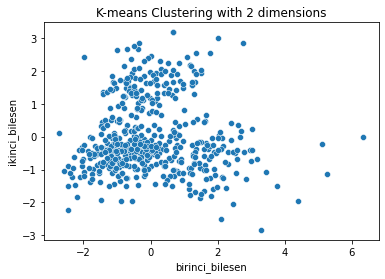

In [21]:
sns.scatterplot(x="birinci_bilesen", y="ikinci_bilesen", data=bilesen_df)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# Conclusion #

Decided the clustering method is not proper sufficiently for research due to following reasons: 
* Not enogh data count for clustering
* Not enough cluster count to each method